In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('./data/2d-training-data.csv')
df.head()

,Name,Age,Salary
0,a,27,70000
1,b,29,90000
2,c,29,61000
3,d,28,60000
4,e,42,150000


Text(0, 0.5, 'Salary')

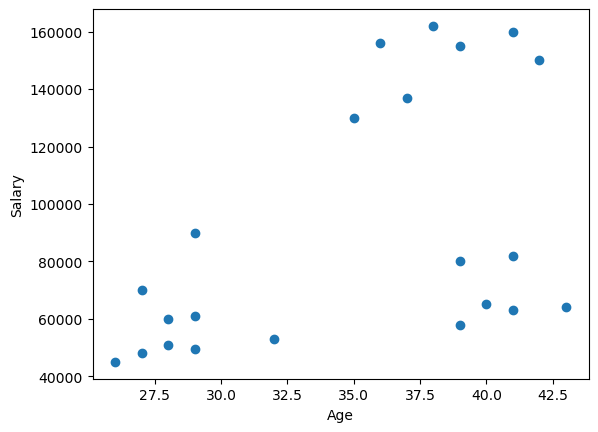

In [3]:
plt.scatter(df.Age, df.Salary)
plt.xlabel('Age')
plt.ylabel('Salary')

In [4]:
filteredDf = df[['Age', 'Salary']]
filteredDf.head()

,Age,Salary
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [5]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(filteredDf)
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [6]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Salary,cluster
0,a,27,70000,0
1,b,29,90000,0
2,c,29,61000,2
3,d,28,60000,2
4,e,42,150000,1


In [7]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [8]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

df1.head()
df2.head()

,Name,Age,Salary,cluster
4,e,42,150000,1
5,f,39,155000,1
6,g,41,160000,1
7,h,38,162000,1
8,i,36,156000,1


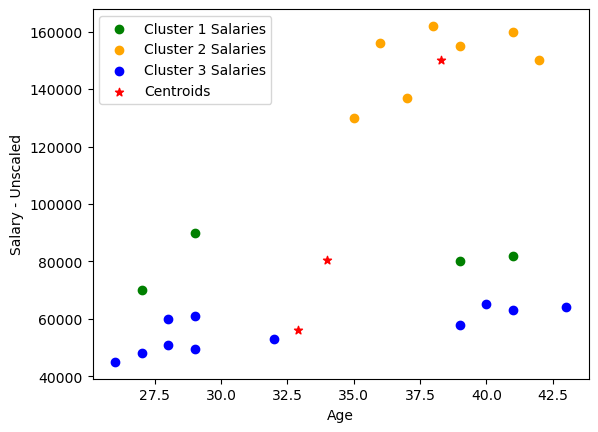

In [9]:
plt.scatter(df1.Age, df1.Salary, color='green', label='Cluster 1 Salaries')
plt.scatter(df2.Age, df2.Salary, color='orange', label='Cluster 2 Salaries')
plt.scatter(df3.Age, df3.Salary, color='blue', label='Cluster 3 Salaries')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='red', marker='*', label='Centroids')

plt.xlabel('Age')
plt.ylabel('Salary - Unscaled')

plt.legend()
# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1])

# After scaling using MinMaxScaler

In [10]:
scaledDf = df
scaledDf.head()

,Name,Age,Salary,cluster
0,a,27,70000,0
1,b,29,90000,0
2,c,29,61000,2
3,d,28,60000,2
4,e,42,150000,1


In [11]:
scaler = MinMaxScaler()

scaler.fit(scaledDf[['Salary']])
scaledDf.Salary = scaler.transform(scaledDf[['Salary']])

scaler.fit(scaledDf[['Age']])
scaledDf.Age = scaler.transform(scaledDf[['Age']])

scaledDf.head()

,Name,Age,Salary,cluster
0,a,0.058824,0.213675,0
1,b,0.176471,0.384615,0
2,c,0.176471,0.136752,2
3,d,0.117647,0.128205,2
4,e,0.941176,0.897436,1


In [12]:
scaledDfFiltered = scaledDf[['Age', 'Salary']]
scaledDfFiltered.head()

,Age,Salary
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [13]:
km_post_scaling = KMeans(n_clusters=3)
clustersPostScaling = km_post_scaling.fit(scaledDfFiltered)
clustersPostScaling

KMeans(n_clusters=3)

# Read and prepare test data for predicting

In [14]:
testDf = pd.read_csv('./data/2d-test-data.csv')
testDf.head()

,Name,Age,Salary
0,aa,51,2000
1,bb,55,8000
2,cc,72,9500
3,dd,81,2500
4,ee,45,5000


In [15]:
scaler = MinMaxScaler()

scaler.fit(testDf[['Salary']])
testDf.Salary = scaler.transform(testDf[['Salary']])

scaler.fit(testDf[['Age']])
testDf.Age = scaler.transform(testDf[['Age']])

testDf.head()

,Name,Age,Salary
0,aa,0.136364,0.000000
1,bb,0.227273,0.181818
2,cc,0.613636,0.227273
3,dd,0.818182,0.015152
4,ee,0.000000,0.090909


In [18]:
testDfFiltered = testDf[['Age', 'Salary']]
testDfFiltered.head()

,Age,Salary
0,0.136364,0.000000
1,0.227273,0.181818
2,0.613636,0.227273
3,0.818182,0.015152
4,0.000000,0.090909


In [ ]:
km_post_scaling.predict(testDfFiltered)

In [17]:
testDf['clustersPostScaling'] = clustersPostScaling
testDf

,Name,Age,Salary,cluster,clustersPostScaling
0,aa,0.136364,0.000000,0,1
1,bb,0.227273,0.181818,0,1
2,cc,0.613636,0.227273,0,0
3,dd,0.818182,0.015152,0,0
4,ee,0.000000,0.090909,0,1
5,ff,0.250000,0.242424,0,1
6,gg,0.636364,0.393939,1,0
7,hh,0.977273,0.545455,1,0
8,ii,0.500000,0.363636,1,0
9,jj,0.295455,0.575758,1,2


In [18]:
scaledDf['Original_Age'] = df.Age
scaledDf['Original_Salary'] = df.Salary
scaledDf

,Name,Age,Salary,cluster,clustersPostScaling,Original_Age,Original_Salary
0,aa,0.136364,0.000000,0,1,0.136364,0.000000
1,bb,0.227273,0.181818,0,1,0.227273,0.181818
2,cc,0.613636,0.227273,0,0,0.613636,0.227273
3,dd,0.818182,0.015152,0,0,0.818182,0.015152
4,ee,0.000000,0.090909,0,1,0.000000,0.090909
5,ff,0.250000,0.242424,0,1,0.250000,0.242424
6,gg,0.636364,0.393939,1,0,0.636364,0.393939
7,hh,0.977273,0.545455,1,0,0.977273,0.545455
8,ii,0.500000,0.363636,1,0,0.500000,0.363636
9,jj,0.295455,0.575758,1,2,0.295455,0.575758


# Plotting post scaling

In [19]:
df4 = scaledDf[scaledDf.clustersPostScaling == 0]
df5 = scaledDf[scaledDf.clustersPostScaling == 1]
df6 = scaledDf[scaledDf.clustersPostScaling == 2]

df4.head()

,Name,Age,Salary,cluster,clustersPostScaling,Original_Age,Original_Salary
2,cc,0.613636,0.227273,0,0,0.613636,0.227273
3,dd,0.818182,0.015152,0,0,0.818182,0.015152
6,gg,0.636364,0.393939,1,0,0.636364,0.393939
7,hh,0.977273,0.545455,1,0,0.977273,0.545455
8,ii,0.500000,0.363636,1,0,0.500000,0.363636


In [20]:
km_post_scaling.cluster_centers_

array([[0.74090909, 0.22909091],
       [0.18181818, 0.18939394],
       [0.33522727, 0.78030303]])

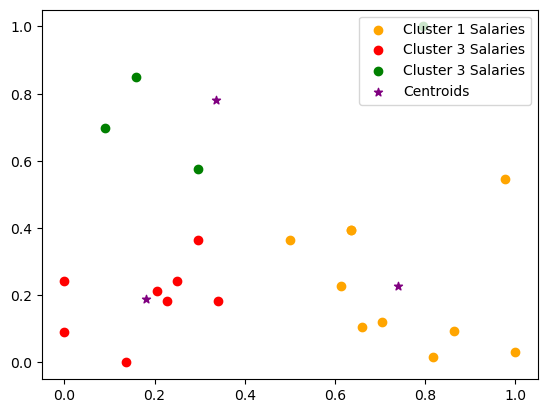

In [21]:
plt.scatter(df4.Age, df4.Salary, color='orange', label='Cluster 1 Salaries')
plt.scatter(df5.Age, df5.Salary, color='red', label='Cluster 3 Salaries')
plt.scatter(df6.Age, df6.Salary, color='green', label='Cluster 3 Salaries')

plt.scatter(km_post_scaling.cluster_centers_[:,0], km_post_scaling.cluster_centers_[:,1], color='purple', marker='*', label='Centroids')

plt.legend()

## Scaling did not improve results so far

## Elbow plot to check if the chosen cluster numbers is right

In [124]:
# Inertia or Sum of squared errors for cluster size = 3
km_post_scaling.inertia_

0.4750783498553096

In [125]:
scaledDfFiltered.head()

,Age,Salary
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [126]:
sse = []
k_range = range(1, 10)

for k in k_range:
    km_range = KMeans(n_clusters=k)
    km_range.fit(scaledDfFiltered)
    sse.append(km_range.inertia_)

sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.3625079900797329,
 0.2621792762345213,
 0.21055478995472499,
 0.16869711728567788,
 0.13762504146528043,
 0.11073569527418642]

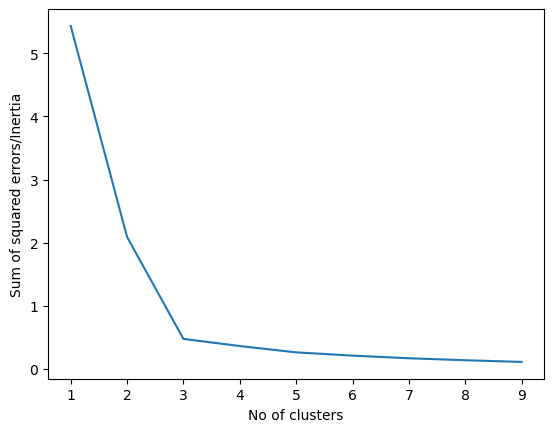

In [127]:
plt.xlabel('No of clusters')
plt.ylabel('Sum of squared errors/Inertia')
plt.plot(k_range, sse)